## A-B Hypothesis Testing: Ad campaign performance

The main objective of this project is to test if an advertising company running an online ad for a client with the intention of increasing brand awareness that the advertising company runs resulted in a significant lift in brand awareness using AB testing.

# Imports

In [83]:
# import required librarier
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
from sklearn.preprocessing import MinMaxScaler

#### Load data

In [39]:
#load data
df=pd.read_csv('C:/Users/user/Desktop/10Academy/Week-2/A-B-Hypothesis-Testing/data/AdSmartABdata.csv')# Store data in dataframe
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [40]:
# column names
list(df.columns)

['auction_id',
 'experiment',
 'date',
 'hour',
 'device_make',
 'platform_os',
 'browser',
 'yes',
 'no']

In [41]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 8077 rows and 9 columns


In [42]:
#check for null values
df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [43]:
#check for duplicates
df.duplicated().any()

False

In [44]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [45]:
#convert date column to date type
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')

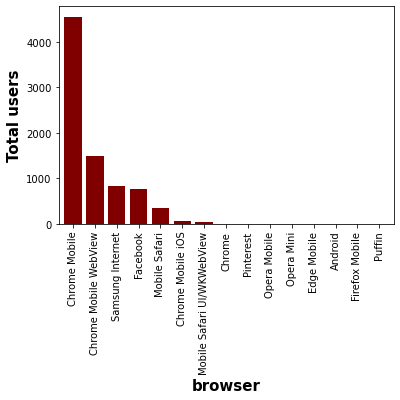

In [46]:
#bar plot for browser
browser_data_count = df['browser'].value_counts()
browser_data_count.plot.bar(color ='maroon', width = 0.8)
plt.xlabel('browser', fontweight ='bold', fontsize = 15)
plt.ylabel('Total users', fontweight ='bold', fontsize = 15)
plt.show()

In [63]:
df['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [64]:
df.sort_values(by=['date'], key=pd.to_datetime)
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [65]:
exposure_grp = df.groupby('experiment')

In [66]:
exposure_grp.get_group('control')

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1
8070,ffcea781-a6e7-4f98-9d90-f95377270476,control,2020-07-03,15,Samsung SM-N976B,6,Facebook,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0


In [67]:
exposure_grp['yes'].value_counts()

experiment  yes
control     0      3807
            1       264
exposed     0      3698
            1       308
Name: yes, dtype: int64

In [68]:
exposure_grp['no'].value_counts()

experiment  no
control     0     3749
            1      322
exposed     0     3657
            1      349
Name: no, dtype: int64

#### Graph  Distribution

Text(0.5, 1.0, 'Control group counts')

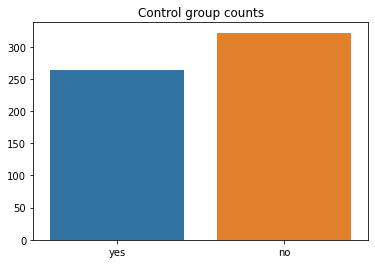

In [79]:
control_grp_yes = 264
control_grp_no = 322
sns.barplot(x= ["yes", "no"], y=[control_grp_yes,control_grp_no])
plt.title('Control group counts')

Text(0.5, 1.0, 'Exposed group counts')

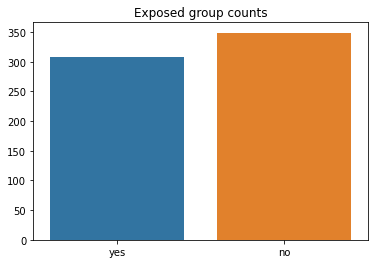

In [80]:
experiment_grp_yes = 308
experiment_grp_no = 349
sns.barplot(x= ["yes", "no"], y=[experiment_grp_yes,experiment_grp_no])
plt.title('Exposed group counts')

In [71]:
exposure_grp['yes'].value_counts().index

MultiIndex([('control', 0),
            ('control', 1),
            ('exposed', 0),
            ('exposed', 1)],
           names=['experiment', 'yes'])

In [72]:
exposure_grp['no'].value_counts()

experiment  no
control     0     3749
            1      322
exposed     0     3657
            1      349
Name: no, dtype: int64

<AxesSubplot:xlabel='yes'>

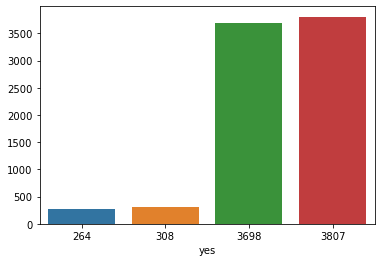

In [73]:
sns.barplot(x= exposure_grp['yes'].value_counts().index, y=exposure_grp['yes'].value_counts().values,data=exposure_grp['yes'].value_counts())

In [74]:
respondents_series = df.groupby(['experiment','yes', 'no']).size()
respondents_series

experiment  yes  no
control     0    0     3485
                 1      322
            1    0      264
exposed     0    0     3349
                 1      349
            1    0      308
dtype: int64

In [75]:
df.shape

(8077, 9)

Out of 8077 respondents 6834 skipped the question 671 answered no and only 572 saw the ad

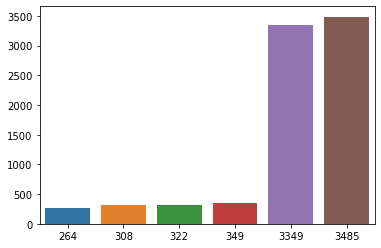

In [77]:
ax = sns.barplot(x=respondents_series.index, y=respondents_series.values, data=respondents_series)

In [78]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

auction_id             object
experiment             object
date           datetime64[ns]
hour                    int64
device_make            object
platform_os             int64
browser                object
yes                     int64
no                      int64
dtype: object

## Date Based analysis

In [ ]:
df = df.sort_values(by = 'date')

In [ ]:
date_series = df['date'].value_counts().sort_index()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

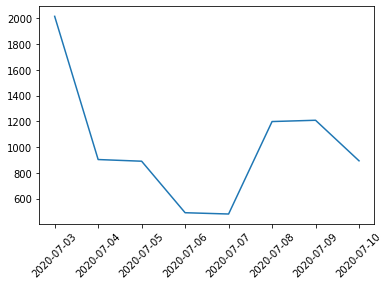

In [ ]:
ax = sns.lineplot(x= date_series.index, y = date_series.values)
plt.setp(ax.get_xticklabels(), rotation=45)

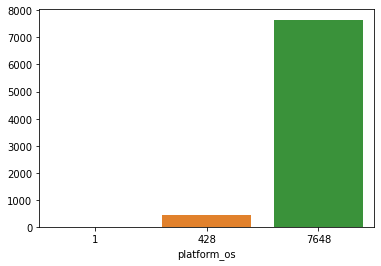

In [ ]:
platform_series = df['platform_os'].value_counts()
sns.barplot(x = platform_series.index, y= platform_series.values, data=platform_series)

In [ ]:
browser_series = 

## Based on date how much did BIO increase

In [ ]:
bio_series = df.groupby(['date','experiment','yes', 'no']).size()
bio_series

date        experiment  yes  no
2020-07-03  control     0    0     1312
                             1      129
                        1    0      104
            exposed     0    0      378
                             1       49
                        1    0       43
2020-07-04  control     0    0      358
                             1       38
                        1    0       30
            exposed     0    0      386
                             1       45
                        1    0       46
2020-07-05  control     0    0      319
                             1       26
                        1    0       17
            exposed     0    0      454
                             1       39
                        1    0       35
2020-07-06  control     0    0      170
                             1       14
                        1    0       12
            exposed     0    0      246
                             1       25
                        1    0       23
2020-07-

In [ ]:
for date, new_df in bio_series.groupby(level=0):
  print(date)
  for experiment, new_df in bio_series.groupby(level=1):
    print(experiment)
    if experiment == "control":
      control_df = pd.DataFrame(new_df)
      control_df['percent'] = control_df.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
      print(control_df)
    elif experiment == "exposed":
      exposed_df = pd.DataFrame(new_df)
      exposed_df['percent'] = exposed_df.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
      print(exposed_df)
  break

2020-07-03 00:00:00
control
                                 0  percent
date       experiment yes no               
2020-07-03 control    0   0   1312     0.85
                          1    129     0.08
                      1   0    104     0.07
2020-07-04 control    0   0    358     0.84
                          1     38     0.09
                      1   0     30     0.07
2020-07-05 control    0   0    319     0.88
                          1     26     0.07
                      1   0     17     0.05
2020-07-06 control    0   0    170     0.87
                          1     14     0.07
                      1   0     12     0.06
2020-07-07 control    0   0    186     0.83
                          1     21     0.09
                      1   0     16     0.07
2020-07-08 control    0   0    426     0.88
                          1     31     0.06
                      1   0     27     0.06
2020-07-09 control    0   0    415     0.86
                          1     35     0.07
    

In [ ]:
def unstack_df(df):
  unstacked_df = df.unstack(level=[2,3])
  unstacked_df = unstacked_df.reset_index(level=1, drop=True)
  return unstacked_df

In [ ]:
control_df = unstack_df(control_df)
exposed_df = unstack_df(exposed_df)

In [ ]:
control_df.head()

0           percent            
yes            0         1       0           1
no             0    1    0       0     1     0
date                                          
2020-07-03  1312  129  104    0.85  0.08  0.07
2020-07-04   358   38   30    0.84  0.09  0.07
2020-07-05   319   26   17    0.88  0.07  0.05
2020-07-06   170   14   12    0.87  0.07  0.06
2020-07-07   186   21   16    0.83  0.09  0.07

In [ ]:
# unstacked_df.columns = unstacked_df.columns.droplevel()
# df.columns = df.columns.droplevel()
control_df.columns = control_df.columns.droplevel(2)
exposed_df.columns = exposed_df.columns.droplevel(2)

In [ ]:
control_df

no,0,1,0,0,1,0
date,,,,,,
2020-07-03,1312,129,104,0.85,0.08,0.07
2020-07-04,358,38,30,0.84,0.09,0.07
2020-07-05,319,26,17,0.88,0.07,0.05
2020-07-06,170,14,12,0.87,0.07,0.06
2020-07-07,186,21,16,0.83,0.09,0.07
2020-07-08,426,31,27,0.88,0.06,0.06
2020-07-09,415,35,30,0.86,0.07,0.06
2020-07-10,299,28,28,0.84,0.08,0.08


In [ ]:
control_df.columns = ["Control:Original:00","Original:01","Original:10","Percent:00","Percent:01","Percent:10"]
exposed_df.columns = ["Original:00","Original:01","Original:10","Percent:00","Percent:01","Percent:10"]

In [ ]:
merged_df = pd.concat([control_df[["Control:Original:00","Original:01","Original:10"]] , exposed_df[["Original:00","Original:01","Original:10"]]],axis=1)
merged_df

,Control:Original:00,Original:01,Original:10,Original:00,Original:01,Original:10
date,,,,,,
2020-07-03,1312,129,104,378,49,43
2020-07-04,358,38,30,386,45,46
2020-07-05,319,26,17,454,39,35
2020-07-06,170,14,12,246,25,23
2020-07-07,186,21,16,211,24,22
2020-07-08,426,31,27,595,61,58
2020-07-09,415,35,30,609,64,55
2020-07-10,299,28,28,470,42,26


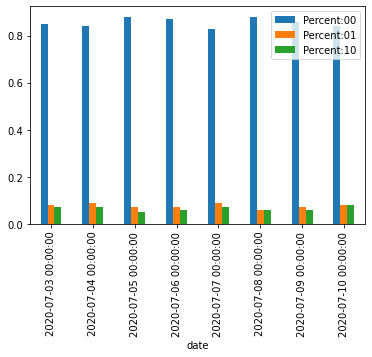

In [ ]:
# sns.barplot(x = date, y = 'Original:00' ,data= merged_df)
# control_df[['Percent:00':]].plot.bar()
# control_df.iloc[['Percent:00',	'Percent:01',	'Percent:10']]
ctrl_plt = control_df[['Percent:00',"Percent:01","Percent:10"]]
ctrl_plt.plot.bar()

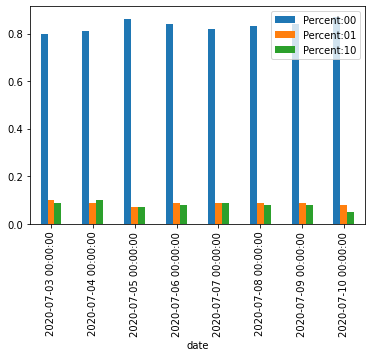

In [ ]:
exp_plt = exposed_df[['Percent:00',"Percent:01","Percent:10"]]
exp_plt.plot.bar()

In [ ]:
control_df

,Original:00,Original:01,Original:10,Percent:00,Percent:01,Percent:10
date,,,,,,
2020-07-03,1312,129,104,0.85,0.08,0.07
2020-07-04,358,38,30,0.84,0.09,0.07
2020-07-05,319,26,17,0.88,0.07,0.05
2020-07-06,170,14,12,0.87,0.07,0.06
2020-07-07,186,21,16,0.83,0.09,0.07
2020-07-08,426,31,27,0.88,0.06,0.06
2020-07-09,415,35,30,0.86,0.07,0.06
2020-07-10,299,28,28,0.84,0.08,0.08


In [ ]:
exposed_df

,Original:00,Original:01,Original:10,Percent:00,Percent:01,Percent:10
date,,,,,,
2020-07-03,378,49,43,0.80,0.10,0.09
2020-07-04,386,45,46,0.81,0.09,0.10
2020-07-05,454,39,35,0.86,0.07,0.07
2020-07-06,246,25,23,0.84,0.09,0.08
2020-07-07,211,24,22,0.82,0.09,0.09
2020-07-08,595,61,58,0.83,0.09,0.08
2020-07-09,609,64,55,0.84,0.09,0.08
2020-07-10,470,42,26,0.87,0.08,0.05


In [ ]:

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(control_df[["Percent:00",	"Percent:01",	"Percent:10"]])

In [ ]:
exposed_scaled_df = scaler.fit_transform(exposed_df[["Percent:00",	"Percent:01",	"Percent:10"]])

In [ ]:
scaled_df

array([[0.4       , 0.66666667, 0.66666667],
       [0.2       , 1.        , 0.66666667],
       [1.        , 0.33333333, 0.        ],
       [0.8       , 0.33333333, 0.33333333],
       [0.        , 1.        , 0.66666667],
       [1.        , 0.        , 0.33333333],
       [0.6       , 0.33333333, 0.33333333],
       [0.2       , 0.66666667, 1.        ]])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

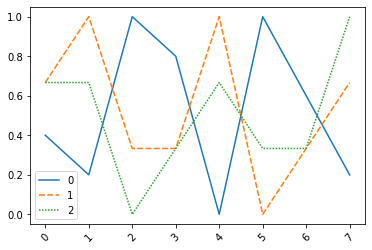

In [ ]:
ax = sns.lineplot(data=scaled_df)
plt.setp(ax.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

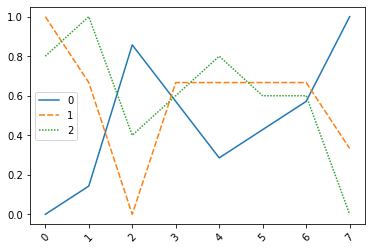

In [ ]:
ax = sns.lineplot(data=exposed_scaled_df)
plt.setp(ax.get_xticklabels(), rotation=45)

In [ ]:
ax = sns.lineplot(x= date_series.index, y = date_series.values)
plt.setp(ax.get_xticklabels(), rotation=45)

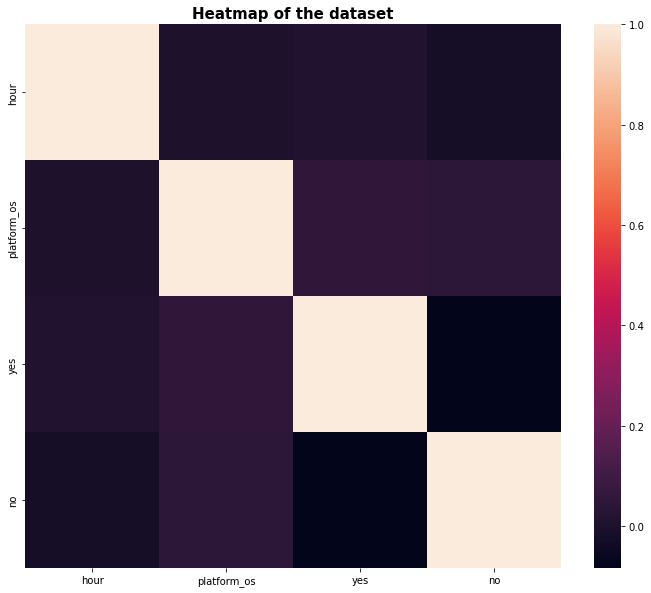

In [81]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr)
plt.title('Heatmap of the dataset', fontsize=15, fontweight='bold')
plt.show()